# Marketing Funnel Analysis

This project analyzes marketing funnel data to identify:
- Conversion drop-offs across funnel stages
- Channel-wise performance
- Opportunities to improve lead-to-customer conversion rates

# In ad_spend column have null values so clean it using libraries

In [28]:

#installing the Libraries
import pandas as pd
import numpy as np
df=pd.read_csv("https://github.com/rajpatil56/FUTURE_DS_03/raw/4fd048392cd29fa957e91df4f804e19ad8fa14e3/marketing_funnel_500_rows.csv")

# Check unique values in ad_spend
df['ad_spend'].unique()

# Replace 0 with NaN (0 spend is invalid)
df['ad_spend'] = df['ad_spend'].replace(0, np.nan)

# Preview cleaned data
df.head()

,date,channel,visitors,leads,customers,ad_spend
0,2025-01-01,Organic Search,1002,168,36,NaN
1,2025-01-01,Paid Ads,771,104,17,4466.0
2,2025-01-01,Social Media,714,59,12,2130.0
3,2025-01-01,Email,449,93,37,1213.0
4,2025-01-01,Referral,493,88,35,660.0


In [29]:
df['ad_spend']

,ad_spend
0,NaN
1,4466.0
2,2130.0
3,1213.0
4,660.0
...,...
495,NaN
496,4629.0
497,4368.0
498,1205.0


In [30]:
df['ad_spend'].isnull().sum()

np.int64(100)

In [31]:

#Getting the dataset overview
print(df.describe())

          visitors       leads   customers     ad_spend
count   500.000000  500.000000  500.000000   400.000000
mean    775.882000  127.308000   33.462000  2650.720000
std     328.418046   46.498358   17.368474  1936.566138
min     200.000000   43.000000    6.000000   527.000000
25%     501.750000   91.000000   20.000000  1013.500000
50%     729.500000  122.000000   31.000000  1748.000000
75%    1044.000000  161.000000   44.000000  4283.500000
max    1495.000000  263.000000  101.000000  6987.000000


In [32]:

#Using mode to Fill the null values
df['ad_spend']=df['ad_spend'].fillna(df['ad_spend'].mode()[0])
df

,date,channel,visitors,leads,customers,ad_spend
0,2025-01-01,Organic Search,1002,168,36,781.0
1,2025-01-01,Paid Ads,771,104,17,4466.0
2,2025-01-01,Social Media,714,59,12,2130.0
3,2025-01-01,Email,449,93,37,1213.0
4,2025-01-01,Referral,493,88,35,660.0
...,...,...,...,...,...,...
495,2025-04-10,Organic Search,1299,207,57,781.0
496,2025-04-10,Paid Ads,1241,141,26,4629.0
497,2025-04-10,Social Media,504,62,12,4368.0
498,2025-04-10,Email,420,126,39,1205.0


#Checking any column value doesn't have the 0

In [33]:
(df==0).any()

,0
date,False
channel,False
visitors,False
leads,False
customers,False
ad_spend,False


#Checking again the column doesn't have null values

In [34]:
df.isnull().sum()

,0
date,0
channel,0
visitors,0
leads,0
customers,0
ad_spend,0


#KPI PART

#A KPI is a measurable value that shows how well something is performing against a goal.

In [35]:

"""Shows how well traffic turns into leads.
Vistors->lead conversion"""
df['VLC']=(df['visitors']/df['leads'])*100
df['VLC']=df['VLC'].round(2)
print(df['VLC'])

0       596.43
1       741.35
2      1210.17
3       482.80
4       560.23
        ...   
495     627.54
496     880.14
497     812.90
498     333.33
499     352.46
Name: VLC, Length: 500, dtype: float64


In [36]:
"""Shows how good your sales or follow-up process is.
Lead->Customer Conversion"""

df['LCC']=(df['leads']/df['customers'])*100
df['LCC']=df['LCC'].round(2)
print(df['LCC'])

0      466.67
1      611.76
2      491.67
3      251.35
4      251.43
        ...  
495    363.16
496    542.31
497    516.67
498    323.08
499    297.56
Name: LCC, Length: 500, dtype: float64


In [37]:
df

,date,channel,visitors,leads,customers,ad_spend,VLC,LCC
0,2025-01-01,Organic Search,1002,168,36,781.0,596.43,466.67
1,2025-01-01,Paid Ads,771,104,17,4466.0,741.35,611.76
2,2025-01-01,Social Media,714,59,12,2130.0,1210.17,491.67
3,2025-01-01,Email,449,93,37,1213.0,482.80,251.35
4,2025-01-01,Referral,493,88,35,660.0,560.23,251.43
...,...,...,...,...,...,...,...,...
495,2025-04-10,Organic Search,1299,207,57,781.0,627.54,363.16
496,2025-04-10,Paid Ads,1241,141,26,4629.0,880.14,542.31
497,2025-04-10,Social Media,504,62,12,4368.0,812.90,516.67
498,2025-04-10,Email,420,126,39,1205.0,333.33,323.08


In [38]:

#Percentage of visitors who finally became customers.
df["overall_conversion_rate"] = (
    df["customers"] / df["visitors"]
) * 100

df["overall_conversion_rate"] = round(df["overall_conversion_rate"], 2)

#Checking what kind of values have in overall_conversion_rate

In [39]:
df['overall_conversion_rate'].unique()

array([ 3.59,  2.2 ,  1.68,  8.24,  7.1 ,  3.09,  2.46,  1.95, 10.71,
        8.1 ,  4.51,  2.3 ,  1.38,  8.32,  5.97,  4.84,  2.58,  1.45,
       11.41,  6.22,  1.71,  2.27, 14.12,  7.69,  3.11,  3.27,  1.06,
        7.64,  9.16,  3.18,  2.64,  1.89,  8.78,  8.45,  2.92,  2.04,
        1.23, 10.78,  5.66,  3.79,  1.92,  1.96,  7.93,  5.48,  3.19,
        2.49,  2.06, 10.2 ,  9.9 ,  3.29,  2.61,  1.28, 11.11,  7.76,
        5.22,  3.21,  1.91, 11.09, 10.58,  2.52,  2.76,  1.79,  6.62,
        5.88,  3.68,  2.44, 12.26,  9.73,  3.07,  9.5 ,  7.38,  1.78,
       10.51,  8.63,  4.8 ,  1.55,  1.04, 11.56,  6.33,  5.02,  1.5 ,
        1.3 ,  7.59,  3.38,  3.41,  8.99,  6.76,  3.26,  3.06,  9.36,
        5.25,  2.41,  2.  ,  1.43, 10.06,  5.11,  3.8 , 11.53,  9.52,
        3.5 ,  1.63,  1.48,  9.69,  5.41,  3.52,  1.99, 10.45, 10.86,
        3.65,  2.57,  1.19, 14.53, 11.39,  2.56,  1.8 , 10.19,  5.71,
        4.3 ,  2.84,  2.09,  9.21,  8.16,  4.89,  2.73,  1.76,  8.  ,
        4.92,  3.56,

In [40]:

#Shows how much ad money is spent to get one lead.
df["CPL"] = round(
    df["ad_spend"] / df["leads"], 2
)

In [41]:


#Shows how much ad money is spent to get one customer
df["CPC"] = round(
    df["ad_spend"] / df["customers"], 2
)

In [42]:
df.head(5)

,date,channel,visitors,leads,customers,ad_spend,VLC,LCC,overall_conversion_rate,CPL,CPC
0,2025-01-01,Organic Search,1002,168,36,781.0,596.43,466.67,3.59,4.65,21.69
1,2025-01-01,Paid Ads,771,104,17,4466.0,741.35,611.76,2.20,42.94,262.71
2,2025-01-01,Social Media,714,59,12,2130.0,1210.17,491.67,1.68,36.10,177.50
3,2025-01-01,Email,449,93,37,1213.0,482.80,251.35,8.24,13.04,32.78
4,2025-01-01,Referral,493,88,35,660.0,560.23,251.43,7.10,7.50,18.86


Questions :- 1)Where is the biggest drop-off in the funnel?
Uses: Visitors → Leads → Customers
👉 Identifies which stage needs optimization

2)Which marketing channel is the most effective in acquiring customers?

3)Does higher ad spend always lead to more customers?

4)How much vistors are converted into customers in months ?

5)Which channels are most effective at generating high lead volume and does that success translate into actual customer conversions ?

In [43]:
import matplotlib.pyplot as plt

In [44]:
Total_visitors=df['visitors'].sum()
Total_customers=df['customers'].sum()
Total_leads=df['leads'].sum()

1)Where is the biggest drop-off in the funnel? Uses: Visitors → Leads → Customers 👉 Identifies which stage needs optimization

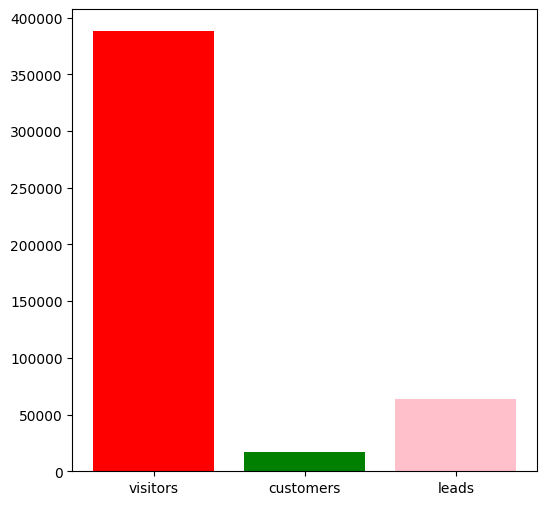

In [45]:
plt.figure(figsize=(6,6))
x=['visitors','customers','leads']
y=(Total_visitors,Total_customers,Total_leads)
c=['r','g','pink']
plt.bar(x,y,color=c)
plt.show()

#Observation:
There is a significant drop-off from Leads → Customers.
This means:
Visitors are coming ✔
Leads are being generated ✔
Leads are not converting into customers ❌

 Marketing is doing its job
👉 Sales / product / pricing / trust is the problem

2)Which marketing channel is the most effective in acquiring customers?

In [46]:
customers_by_channel=df.groupby(['channel'])['customers'].sum()

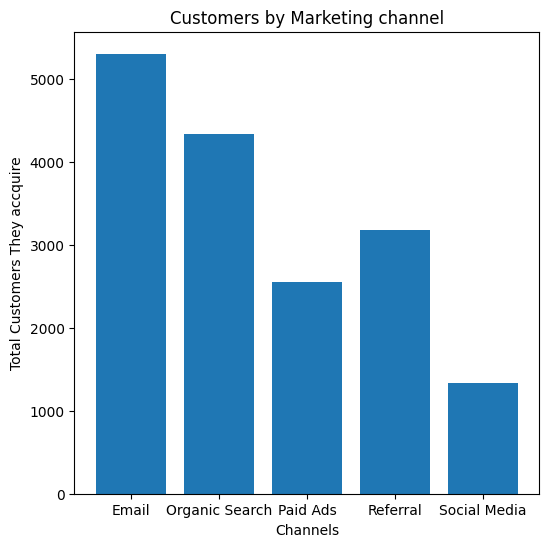

In [47]:
plt.figure(figsize=(6,6))
X=(customers_by_channel.index)
Y=(customers_by_channel.values)
plt.xlabel('Channels')
plt.ylabel('Total Customers They accquire')
plt.title('Customers by Marketing channel')
plt.bar(X,Y)
plt.show()

Observation:-
Email marketing converts existing interested users better than organic search or Referal and requires less ad spend to acquire customers.

3)Does higher ad spend always lead to more customers?

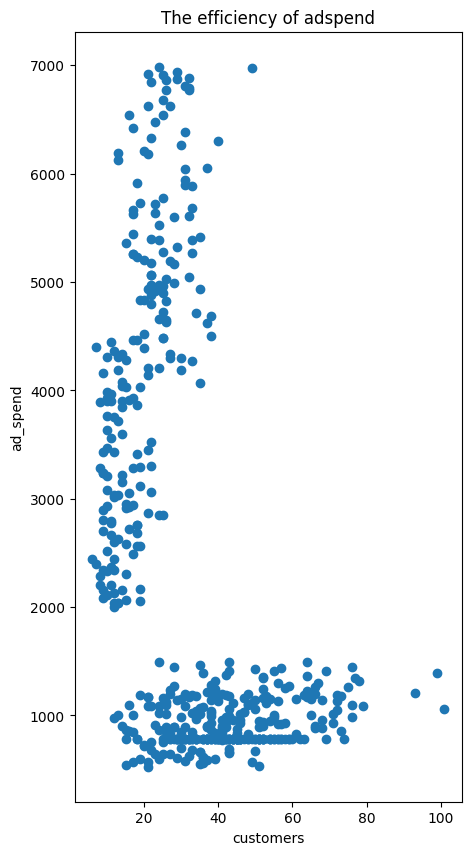

In [48]:
plt.figure(figsize=(5,10))
plt.title('The efficiency of adspend')
plt.xlabel("customers")
plt.ylabel("ad_spend")
x=(df['customers'])
y=(df['ad_spend'])
plt.scatter(x,y)
plt.show()

Observation :- No, higher ad spend does NOT always lead to more customers

Spending more money on ads does not guarantee more customers.
Efficiency of the channel matters more than total spend.

In [49]:
df.tail(5)

,date,channel,visitors,leads,customers,ad_spend,VLC,LCC,overall_conversion_rate,CPL,CPC
495,2025-04-10,Organic Search,1299,207,57,781.0,627.54,363.16,4.39,3.77,13.70
496,2025-04-10,Paid Ads,1241,141,26,4629.0,880.14,542.31,2.10,32.83,178.04
497,2025-04-10,Social Media,504,62,12,4368.0,812.90,516.67,2.38,70.45,364.00
498,2025-04-10,Email,420,126,39,1205.0,333.33,323.08,9.29,9.56,30.90
499,2025-04-10,Referral,430,122,41,959.0,352.46,297.56,9.53,7.86,23.39


4)How much visitors are converted into customers in months ?

In [50]:
import seaborn as sns

In [51]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime('%b')

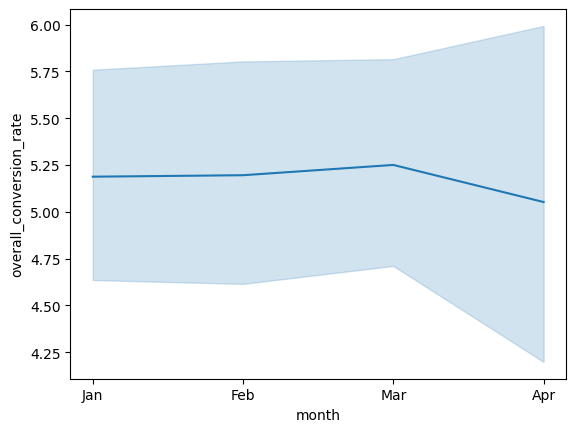

In [52]:
sns.lineplot(x="month",y="overall_conversion_rate",data=df)
plt.show()

5)Which channels are most effective at generating high lead volume and does that success translate into actual customer conversions ?

In [53]:
Channel_wise_VCL=df.groupby(['channel'])['VLC'].sum()
Channel_wise_LCC=df.groupby(['channel'])['LCC'].sum()

In [54]:
import plotly.graph_objects as go
fig=go.Figure()
x1,y1=(Channel_wise_VCL.index,Channel_wise_VCL.values)
x2,y2=(Channel_wise_LCC.index,Channel_wise_LCC.values)

fig.add_trace(go.Scatter(x=x1,y=y1,name="visitors to leads conversion",mode="lines"))
fig.add_trace(go.Scatter(x=x2,y=y2,name="leads to customers conversion",mode="lines+markers"))
fig.update_layout(xaxis_title="channels",yaxis_title="Visitors → Leads:Conversion(%)    Leads → Customers : Conversion(%)")

Social Media: High leads and high customer conversion (best overall).

Paid Ads: Many leads, but fewer turn into customers.

Organic Search: Stable and balanced performance.

Email: Fewer leads, but good-quality conversions.

Referral: Low leads, but high trust and strong conversion.